In [12]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

In [2]:
'''name definition'''
example = '/home/luluvyd/examples/data/MovieSummary_example.txt'
filename = '/home/luluvyd/corpus/MovieSummaries/plot_summaries.txt'
outdirect = '/home/luluvyd/corpus/MovieSummaries/MovieSummaries-break/'

In [3]:
emos = loadEmotionWords('/home/luluvyd/corpus/NRC-Emotion-Lexicon-v0.92/Generated-EmotionWords.txt')

In [4]:
def scoreEmos(line, emos): 
    '''Use string functions to find emotion words in a string'''
    words = line.strip().split()
    words = [w for w in words if w.isalpha()]
    emoWords = [w for w in words if w in emos]
    return float(len(emoWords))/ len(words)

def scoreArticle(infile, emos): 
    '''
    compute the emotion scores of input files
    infile : name of file containing articles 
    result : list of scores
    '''
    line = infile.readline()
    result = []
    while line:
        s = scoreEmos(line, emos)
        result.append(s)
        line = infile.readline()
    return result

In [ ]:
'''
Example : break-up cmu movie view file
'''
with open(example, 'r', errors='replace') as f:
    r = processArticle(f, emos)
    print(r)
f.close()

In [6]:
'''
Corpus : break-up cmu movie view file
'''
scores = []
with open(filename, 'r', errors='replace') as f:
    r = scoreArticle(f, emos)
    scores += r

In [8]:
len(scores)

42306

/home/luluvyd/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


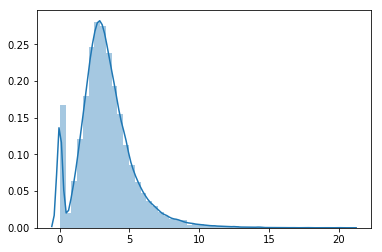

In [13]:
scoresPer = np.array(scores)*100
maxScore = max(scoresPer)

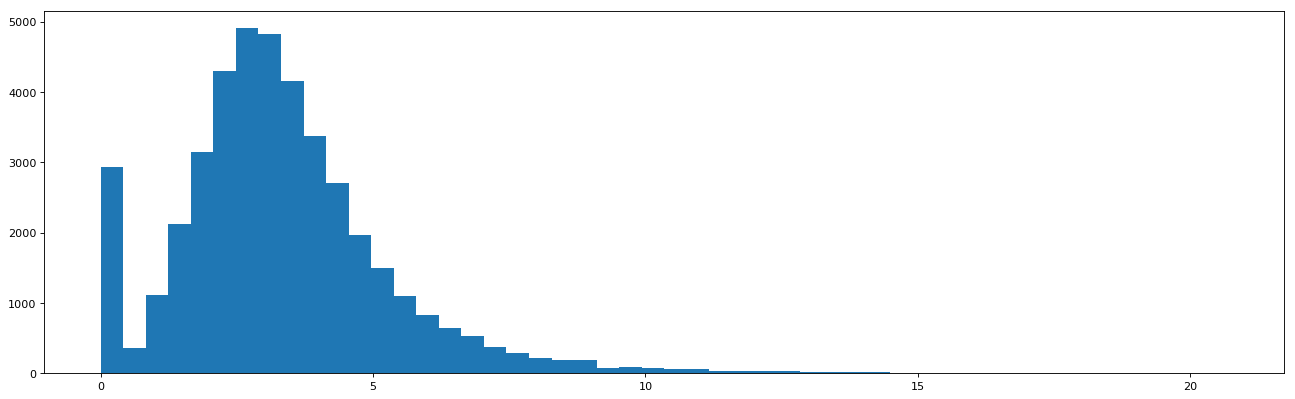

In [14]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
n_bins = 50
plt.hist(scoresPer,bins=n_bins)
plt.show()